In [1]:
import tensorflow as tf


In [2]:
model_for_lenet5_deneme1 = tf.keras.models.load_model(r'C:\Users\ŞeymaÇakmak\Desktop\BİL 468\Project\Project Code\lenet-5_1.keras')
model_for_lenet5_deneme2 = tf.keras.models.load_model(r'C:\Users\ŞeymaÇakmak\Desktop\BİL 468\Project\Project Code\lenet-5_2.keras')
model_for_lenet5_deneme3 = tf.keras.models.load_model(r'C:\Users\ŞeymaÇakmak\Desktop\BİL 468\Project\Project Code\lenet-5_3.keras')


C:\Users\ŞeymaÇakmak\AppData\Roaming\Python\Python39\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from sklearn.metrics import accuracy_score
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [4]:
# Load the test data and create the test sets
test_folder = r"C:\Users\ŞeymaÇakmak\Desktop\BİL 468\Project\Project Code\Dataset MAIN\test_data\test_data"


test_csv = pd.read_csv(r"C:\Users\ŞeymaÇakmak\Desktop\BİL 468\Project\Project Code\Dataset MAIN\test_labels.csv")
labels = test_csv['label'].values  # y_test
images = test_csv['image'].values
x_test = []

for imagePath in images:
    image = plt.imread(test_folder+ "\\" + imagePath)
    image = Image.fromarray(image, 'RGB')
    image = image.resize((32, 32))
    x_test.append(np.array(image))

x_test = np.array(x_test)
x_test = x_test/255

In [5]:
# Make the prediction with test data

pred = model_for_lenet5_deneme1.predict(x_test)
pred = np.argmax(pred, axis=1)

# Measure the accuracy with the test data
print('Test Data accuracy: ', accuracy_score(labels, pred)*100)

395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Test Data accuracy:  94.79809976247031


In [6]:
from tensorflow.keras.models import load_model
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

# 'vgg_model_unfreeze_2block' adlı eğitilmiş modelinizin yüklendiği varsayılıyor.
# Eğer bir dosyaya kaydedilmişse, yükleyebilirsiniz: model = load_model('sizin_modelinizin_yolu.h5')
from keras.utils import to_categorical

labels_one_hot = to_categorical(labels)

# Adım 1: Olasılıkları tahmin edin ve sınıf etiketlerine dönüştürün
tahminler = model_for_lenet5_deneme1.predict(x_test)  # Olasılıkları tahmin edin
tahmin_edilen_sınıflar = np.argmax(tahminler, axis=1)  # Olasılıkları sınıf etiketlerine dönüştürün

# Adım 2: Gerekiyorsa one-hot kodlu etiketleri sınıf etiketlerine dönüştürün
gerçek_sınıflar = np.argmax(labels_one_hot, axis=1)  # One-hot kodlu etiketleri sınıf etiketlerine dönüştürün

# Adım 3: Metrikleri Hesapla
macro_precision = precision_score(gerçek_sınıflar, tahmin_edilen_sınıflar, average='macro')
macro_recall = recall_score(gerçek_sınıflar, tahmin_edilen_sınıflar, average='macro')
macro_f1_score = f1_score(gerçek_sınıflar, tahmin_edilen_sınıflar, average='macro')

micro_precision = precision_score(gerçek_sınıflar, tahmin_edilen_sınıflar, average='micro')
micro_recall = recall_score(gerçek_sınıflar, tahmin_edilen_sınıflar, average='micro')
micro_f1_score = f1_score(gerçek_sınıflar, tahmin_edilen_sınıflar, average='micro')

karışıklık_matrisi = confusion_matrix(gerçek_sınıflar, tahmin_edilen_sınıflar)

# Sonuçları Göster
print("Macro-Ortalama Kesinlik:", macro_precision)
print("Macro-Ortalama Duyarlılık:", macro_recall)
print("Macro-Ortalama F1 Skoru:", macro_f1_score)
print("\nMikro-Ortalama Kesinlik:", micro_precision)
print("Mikro-Ortalama Duyarlılık:", micro_recall)
print("Mikro-Ortalama F1 Skoru:", micro_f1_score)


395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Macro-Ortalama Kesinlik: 0.9254142169729923
Macro-Ortalama Duyarlılık: 0.9162116387712949
Macro-Ortalama F1 Skoru: 0.9176456277307877

Mikro-Ortalama Kesinlik: 0.9479809976247031
Mikro-Ortalama Duyarlılık: 0.9479809976247031
Mikro-Ortalama F1 Skoru: 0.9479809976247031


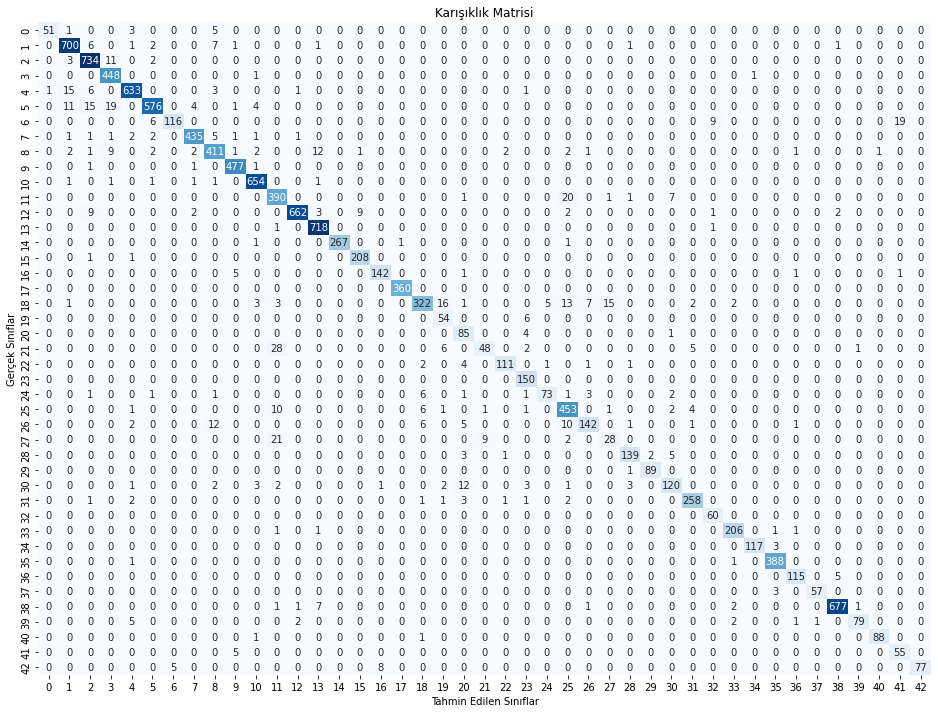

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Karışıklık matrisini görselleştirme
plt.figure(figsize=(16, 12))
sns.heatmap(karışıklık_matrisi, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Karışıklık Matrisi")
plt.xlabel("Tahmin Edilen Sınıflar")
plt.ylabel("Gerçek Sınıflar")
plt.show()


In [8]:
from sklearn.metrics import accuracy_score

from tensorflow.keras.preprocessing import image

# Görüntüyü yükle ve boyutlandır
img = image.load_img(r"C:\Users\ŞeymaÇakmak\Desktop\BİL 468\Project\Project Code\Full_Image\3.jpg", target_size=(32, 32))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Tek bir örnek oluşturmak için boyut ekleyin

# Modeli kullanarak tahmin yapın
predictions = model_for_lenet5_deneme1.predict(img_array)


# Modelin tahmin ettiği olasılıklar
prediction_vector = np.array(predictions)

# En yüksek olasılığa sahip olan sınıfın indeksi
predicted_class_index = np.argmax(prediction_vector)

print(predicted_class_index)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
36


In [9]:
# Make the prediction with test data

pred = model_for_lenet5_deneme2.predict(x_test)
pred = np.argmax(pred, axis=1)

# Measure the accuracy with the test data
print('Test Data accuracy: ', accuracy_score(labels, pred)*100)

395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Test Data accuracy:  91.51227236737925


In [10]:
from tensorflow.keras.models import load_model
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

# 'vgg_model_unfreeze_2block' adlı eğitilmiş modelinizin yüklendiği varsayılıyor.
# Eğer bir dosyaya kaydedilmişse, yükleyebilirsiniz: model = load_model('sizin_modelinizin_yolu.h5')
from keras.utils import to_categorical

labels_one_hot = to_categorical(labels)

# Adım 1: Olasılıkları tahmin edin ve sınıf etiketlerine dönüştürün
tahminler = model_for_lenet5_deneme2.predict(x_test)  # Olasılıkları tahmin edin
tahmin_edilen_sınıflar = np.argmax(tahminler, axis=1)  # Olasılıkları sınıf etiketlerine dönüştürün

# Adım 2: Gerekiyorsa one-hot kodlu etiketleri sınıf etiketlerine dönüştürün
gerçek_sınıflar = np.argmax(labels_one_hot, axis=1)  # One-hot kodlu etiketleri sınıf etiketlerine dönüştürün

# Adım 3: Metrikleri Hesapla
macro_precision = precision_score(gerçek_sınıflar, tahmin_edilen_sınıflar, average='macro')
macro_recall = recall_score(gerçek_sınıflar, tahmin_edilen_sınıflar, average='macro')
macro_f1_score = f1_score(gerçek_sınıflar, tahmin_edilen_sınıflar, average='macro')

micro_precision = precision_score(gerçek_sınıflar, tahmin_edilen_sınıflar, average='micro')
micro_recall = recall_score(gerçek_sınıflar, tahmin_edilen_sınıflar, average='micro')
micro_f1_score = f1_score(gerçek_sınıflar, tahmin_edilen_sınıflar, average='micro')

karışıklık_matrisi = confusion_matrix(gerçek_sınıflar, tahmin_edilen_sınıflar)

# Sonuçları Göster
print("Macro-Ortalama Kesinlik:", macro_precision)
print("Macro-Ortalama Duyarlılık:", macro_recall)
print("Macro-Ortalama F1 Skoru:", macro_f1_score)
print("\nMikro-Ortalama Kesinlik:", micro_precision)
print("Mikro-Ortalama Duyarlılık:", micro_recall)
print("Mikro-Ortalama F1 Skoru:", micro_f1_score)


395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Macro-Ortalama Kesinlik: 0.8830620226279061
Macro-Ortalama Duyarlılık: 0.8604284997760732
Macro-Ortalama F1 Skoru: 0.8629384158533175

Mikro-Ortalama Kesinlik: 0.9151227236737925
Mikro-Ortalama Duyarlılık: 0.9151227236737925
Mikro-Ortalama F1 Skoru: 0.9151227236737925


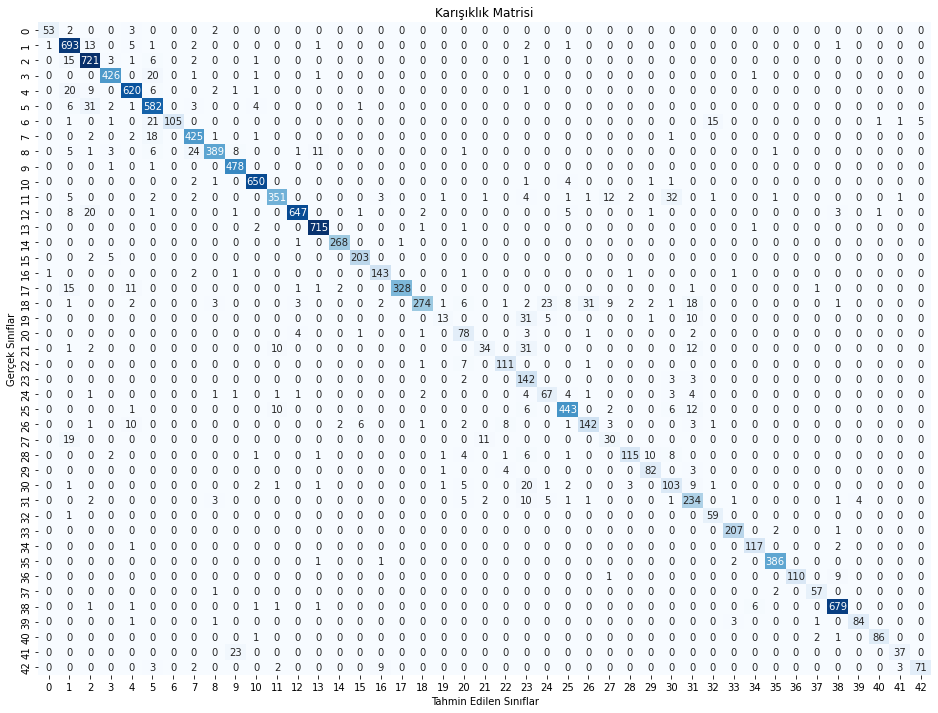

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Karışıklık matrisini görselleştirme
plt.figure(figsize=(16, 12))
sns.heatmap(karışıklık_matrisi, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Karışıklık Matrisi")
plt.xlabel("Tahmin Edilen Sınıflar")
plt.ylabel("Gerçek Sınıflar")
plt.show()


In [12]:
from sklearn.metrics import accuracy_score

from tensorflow.keras.preprocessing import image

# Görüntüyü yükle ve boyutlandır
img = image.load_img(r"C:\Users\ŞeymaÇakmak\Desktop\BİL 468\Project\Project Code\Full_Image\3.jpg", target_size=(32, 32))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Tek bir örnek oluşturmak için boyut ekleyin

# Modeli kullanarak tahmin yapın
predictions = model_for_lenet5_deneme2.predict(img_array)


# Modelin tahmin ettiği olasılıklar
prediction_vector = np.array(predictions)

# En yüksek olasılığa sahip olan sınıfın indeksi
predicted_class_index = np.argmax(prediction_vector)

print(predicted_class_index)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
36


In [13]:
# Make the prediction with test data

pred = model_for_lenet5_deneme3.predict(x_test)
pred = np.argmax(pred, axis=1)

# Measure the accuracy with the test data
print('Test Data accuracy: ', accuracy_score(labels, pred)*100)

395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Test Data accuracy:  91.10055423594616


In [14]:
from tensorflow.keras.models import load_model
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

# 'vgg_model_unfreeze_2block' adlı eğitilmiş modelinizin yüklendiği varsayılıyor.
# Eğer bir dosyaya kaydedilmişse, yükleyebilirsiniz: model = load_model('sizin_modelinizin_yolu.h5')
from keras.utils import to_categorical

labels_one_hot = to_categorical(labels)

# Adım 1: Olasılıkları tahmin edin ve sınıf etiketlerine dönüştürün
tahminler = model_for_lenet5_deneme3.predict(x_test)  # Olasılıkları tahmin edin
tahmin_edilen_sınıflar = np.argmax(tahminler, axis=1)  # Olasılıkları sınıf etiketlerine dönüştürün

# Adım 2: Gerekiyorsa one-hot kodlu etiketleri sınıf etiketlerine dönüştürün
gerçek_sınıflar = np.argmax(labels_one_hot, axis=1)  # One-hot kodlu etiketleri sınıf etiketlerine dönüştürün

# Adım 3: Metrikleri Hesapla
macro_precision = precision_score(gerçek_sınıflar, tahmin_edilen_sınıflar, average='macro')
macro_recall = recall_score(gerçek_sınıflar, tahmin_edilen_sınıflar, average='macro')
macro_f1_score = f1_score(gerçek_sınıflar, tahmin_edilen_sınıflar, average='macro')

micro_precision = precision_score(gerçek_sınıflar, tahmin_edilen_sınıflar, average='micro')
micro_recall = recall_score(gerçek_sınıflar, tahmin_edilen_sınıflar, average='micro')
micro_f1_score = f1_score(gerçek_sınıflar, tahmin_edilen_sınıflar, average='micro')

karışıklık_matrisi = confusion_matrix(gerçek_sınıflar, tahmin_edilen_sınıflar)

# Sonuçları Göster
print("Macro-Ortalama Kesinlik:", macro_precision)
print("Macro-Ortalama Duyarlılık:", macro_recall)
print("Macro-Ortalama F1 Skoru:", macro_f1_score)
print("\nMikro-Ortalama Kesinlik:", micro_precision)
print("Mikro-Ortalama Duyarlılık:", micro_recall)
print("Mikro-Ortalama F1 Skoru:", micro_f1_score)


395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Macro-Ortalama Kesinlik: 0.8876276810880604
Macro-Ortalama Duyarlılık: 0.8729566339177056
Macro-Ortalama F1 Skoru: 0.874961187372521

Mikro-Ortalama Kesinlik: 0.9110055423594616
Mikro-Ortalama Duyarlılık: 0.9110055423594616
Mikro-Ortalama F1 Skoru: 0.9110055423594616


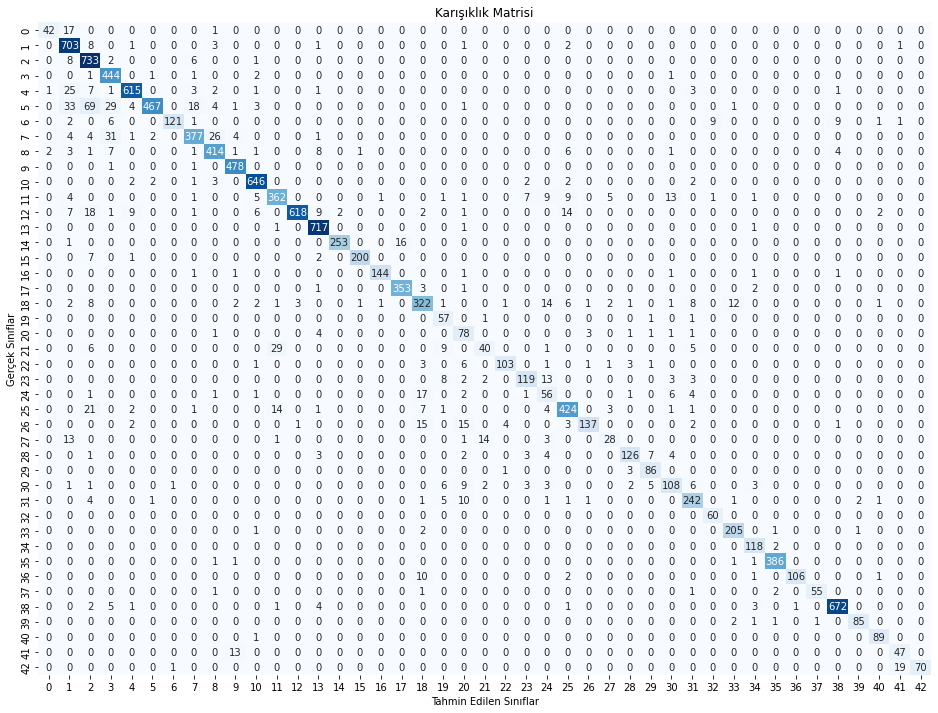

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Karışıklık matrisini görselleştirme
plt.figure(figsize=(16, 12))
sns.heatmap(karışıklık_matrisi, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Karışıklık Matrisi")
plt.xlabel("Tahmin Edilen Sınıflar")
plt.ylabel("Gerçek Sınıflar")
plt.show()


In [16]:
from sklearn.metrics import accuracy_score

from tensorflow.keras.preprocessing import image

# Görüntüyü yükle ve boyutlandır
img = image.load_img(r"C:\Users\ŞeymaÇakmak\Desktop\BİL 468\Project\Project Code\Full_Image\3.jpg", target_size=(32, 32))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Tek bir örnek oluşturmak için boyut ekleyin

# Modeli kullanarak tahmin yapın
predictions = model_for_lenet5_deneme3.predict(img_array)


# Modelin tahmin ettiği olasılıklar
prediction_vector = np.array(predictions)

# En yüksek olasılığa sahip olan sınıfın indeksi
predicted_class_index = np.argmax(prediction_vector)

print(predicted_class_index)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
36


Buradan sonrası doğru çalışmıyor fakat denemelerimizi de paylaşmak istedik.

In [17]:
def sliding_window(image, step, window_size, model, classes, threshold=0.5):
    # Resmin boyutlarını alın
    (h, w) = image.shape[:2]
    
    # Kaydırma penceresi boyutları
    (window_width, window_height) = window_size
    
    # Modelin beklediği giriş boyutları
    (input_width, input_height) = model.input_shape[1:3]
    
    # Tüm pencere tahminlerini saklamak için boş bir liste oluşturun
    all_predictions = []
    
    # Resim üzerinde gezinme döngüsü
    for y in range(0, h - window_height + 1, step):
        for x in range(0, w - window_width + 1, step):
            # Kaydırma penceresini alın
            window = image[y:y + window_height, x:x + window_width]
            
            # Kaydırma penceresini yeniden boyutlandırın
            window_resized = cv2.resize(window, (input_width, input_height))
            
            # Kaydırma penceresini modelinize besleyin ve sonucu alın
            result = model.predict(np.expand_dims(window_resized, axis=0))
            
            # Pencere tahminlerini listeye ekleyin
            all_predictions.append(result)
    
    # Tüm pencere tahminlerini birleştirerek toplu bir tahmin yapın
    all_predictions = np.array(all_predictions)
    all_predictions = np.mean(all_predictions, axis=0)
    
    # Tahminlerin sınıfını belirleyin
    predicted_class = get_predicted_class(all_predictions, classes, threshold)
    
    # Toplu tahmin sonucunu ve tahmin edilen sınıfı yazdırın
    print("Aggregated Prediction:", all_predictions)
    print("Predicted Class for the Whole Image:", predicted_class)

def get_predicted_class(predictions, classes, threshold):
    # Eşik değeri üzerindeki tahminlerin sayısını sayın
    count_over_threshold = np.sum(predictions > threshold)
    
    # Eğer eşik değeri üzerindeki tahminlerin sayısı yeterli ise,
    # en sık tahmin edilen sınıfı döndürün, aksi takdirde "Unknown" sınıfını döndürün
    if count_over_threshold > 0:
        most_common_class_index = np.argmax(predictions)
        predicted_class = classes[most_common_class_index]
    else:
        predicted_class = "Unknown"
    
    return predicted_class


# Test resmini yükleyin
image_path = r"C:\Users\ŞeymaÇakmak\Desktop\BİL 468\Project\Project Code\Full_Image\1.jpg"
image = plt.imread(image_path)

# Pencere boyutu ve kaydırma adımını belirleyin
window_size = (16, 16)
step = 32

# Eşik değerini belirleyin
threshold = 0.2

# Kaydırma penceresini uygulayın
sliding_window(image, step, window_size, model_for_lenet5_deneme1, classes, threshold)


NameError: name 'classes' is not defined

In [ ]:
# Görüntünün boyutlarını alın
height, width, channels = image.shape

print("Height:", height)
print("Width:", width)
print("Channels:", channels)

In [ ]:
import cv2
import numpy as np

def sliding_window(image, step, window_sizes, model, threshold):
    (h, w) = image.shape[:2]
    (input_width, input_height) = model.input_shape[1:3]

    max_confidence = -1
    max_confidence_class = "Unknown"
    best_window_size = None

    for window_size in window_sizes:
        (window_width, window_height) = window_size
        for y in range(0, h - window_height + 1, step):
            for x in range(0, w - window_width + 1, step):
                window = image[y:y + window_height, x:x + window_width]
                window_resized = cv2.resize(window, (input_width, input_height))
                result = model.predict(np.expand_dims(window_resized, axis=0))
                confidence = np.max(result)

                if confidence > max_confidence:
                    max_confidence = confidence
                    max_confidence_class = "Class_" + str(np.argmax(result))
                    best_window_size = window_size

                if max_confidence >= threshold:
                    return max_confidence_class, best_window_size

    return max_confidence_class, best_window_size if max_confidence >= threshold else ("Unknown", None)

# Örnek bir görüntü yükleyin
image_path = r"C:\Users\ŞeymaÇakmak\Desktop\BİL 468\Project\Project Code\Full_Image\1.jpg"
image = plt.imread(image_path)

# Kaydırma adımını belirleyin
step = 32
threshold = 0.95  # Eşik değeri

# Denenecek pencere boyutları aralığını belirtin
min_window_size = (8, 8)
max_window_size = (64, 64)
window_sizes = [(w, h) for w in range(min_window_size[0], max_window_size[0] + 1, 32) for h in range(min_window_size[1], max_window_size[1] + 1, 32)]

# Sonuç için modeli belirtin
model = model_for_lenet5_deneme1

# Kaydırma penceresini uygulayın ve sonucu alın
predicted_class, best_window_size = sliding_window(image, step, window_sizes, model, threshold)

print("Predicted Class for the Whole Image:", predicted_class)
print("Best Window Size:", best_window_size)


In [ ]:
import cv2
import numpy as np

def sliding_window(image, step, window_size):
    # Resmin boyutlarını alın
    (h, w) = image.shape[:2]
    
    # Kaydırma penceresi boyutları
    (window_width, window_height) = window_size
    
    # Resim üzerinde gezinme döngüsü
    for y in range(0, h - window_height + 1, step):
        for x in range(0, w - window_width + 1, step):
            # Kaydırma penceresini alın
            window = image[y:y + window_height, x:x + window_width]
            
            # Pencerede belirli bir şeklin olup olmadığını kontrol edin
            if detect_shape(window):
                print("Window at ({}, {}) contains the shape.".format(x, y))
                # Eğer bir şekil varsa, burada istediğiniz işlemi yapabilirsiniz.

def detect_shape(window):
    # Gri tonlamalı hale getirin
    gray = cv2.cvtColor(window, cv2.COLOR_BGR2GRAY)
    
    # Kenarları tespit etmek için Canny kenar tespiti uygulayın
    edges = cv2.Canny(gray, 50, 150, apertureSize=3)
    
    # Contourları bulun
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Tüm konturları döngüye alın
    for contour in contours:
        # Konturun uzunluğunu hesaplayın
        approx = cv2.approxPolyDP(contour, 0.04 * cv2.arcLength(contour, True), True)
        
        # Eğer kontur 3 kenarlı ise (üçgen), True döndürün
        if len(approx) == 3:
            return True
        # Eğer kontur 4 kenarlı ise (kare), True döndürün
        elif len(approx) == 4:
            return True
        # Eğer kontur yuvarlaksa (daire), True döndürün
        elif len(approx) > 8:
            return True
    
    # Eğer yukarıdaki koşullar sağlanmıyorsa, False döndürün
    return False

# Test resmini yükleyin
image_path = r"C:\Users\ŞeymaÇakmak\Desktop\BİL 468\Project\Project Code\Full_Image\1.jpg"
image = plt.imread(image_path)

# Pencere boyutu ve kaydırma adımını belirleyin
window_size = (64, 64)
step = 32

# Kaydırma penceresini uygulayın
sliding_window(image, step, window_size)


In [ ]:
import cv2

def draw_window(image, x, y, width, height):
    # Pencereyi çizmek için yeni bir figure oluşturun
    plt.figure()
    
    # Resmi gösterin
    plt.imshow(image)
    
    # Pencereyi çizin
    rect = plt.Rectangle((x, y), width, height, linewidth=2, edgecolor='g', facecolor='none')
    plt.gca().add_patch(rect)
    
    # Eksenleri kapatın
    plt.axis('off')
    
    # Pencereyi gösterin
    plt.show()

    
window_x = 128
window_y = 512
window_width = 16
window_height = 16
image_path = r"C:\Users\ŞeymaÇakmak\Desktop\BİL 468\Project\Project Code\Full_Image\1.jpg"
image = plt.imread(image_path)
# Belirtilen pencereyi çizdirin
windows = [
    (1312, 256), (128, 288), (896, 288), (960, 288), (1248, 288), 
    (1280, 288), (1216, 320), (1088, 352), (1056, 384), (1088, 384), 
    (1184, 384), (1056, 416), (512, 448), (544, 448), (608, 448), 
    (672, 448), (896, 448), (128, 480), (128, 512), (256, 512), 
    (288, 512), (128, 544), (896, 544), (832, 576), (1056, 576)
]

for window in windows:
    window_x, window_y = window
    window_width, window_height = 32, 32
    draw_window(image, window_x, window_y, window_width, window_height)

In [ ]:
windows = [
    (0, 0), (928, 224), (960, 224), (992, 224), (1024, 224),
    (1056, 224), (1088, 224), (128, 256), (896, 256), (928, 256),
    (960, 256), (992, 256), (1024, 256), (1056, 256), (1088, 256),
    (1120, 256), (1152, 256), (1280, 256), (128, 288), (864, 288),
    (896, 288), (928, 288), (960, 288), (992, 288), (1024, 288),
    (1056, 288), (1088, 288), (1120, 288), (1152, 288), (1184, 288),
    (1248, 288), (1280, 288), (1312, 288), (128, 320), (160, 320),
    (224, 320), (288, 320), (864, 320), (896, 320), (928, 320),
    (992, 320), (1024, 320), (1056, 320), (1088, 320), (1120, 320),
    (1152, 320), (1184, 320), (1248, 320), (128, 352), (160, 352),
    (832, 352), (864, 352), (928, 352), (960, 352), (992, 352),
    (1024, 352), (1056, 352), (1088, 352), (1120, 352), (1152, 352),
    (1184, 352), (1216, 352), (1280, 352), (1312, 352), (128, 384),
    (160, 384), (384, 384), (832, 384), (864, 384), (896, 384),
    (928, 384), (960, 384), (1024, 384), (1056, 384), (1088, 384),
    (1120, 384), (1152, 384), (1184, 384), (1216, 384), (128, 416),
    (160, 416), (192, 416), (448, 416), (512, 416), (544, 416),
    (640, 416), (672, 416), (832, 416), (864, 416), (896, 416),
    (928, 416), (960, 416), (1024, 416), (1056, 416), (1088, 416),
    (1120, 416), (1152, 416), (1216, 416), (1248, 416), (0, 448),
    (128, 448), (160, 448), (224, 448), (448, 448), (480, 448),
    (512, 448), (544, 448), (576, 448), (608, 448), (640, 448),
    (704, 448), (736, 448), (768, 448), (864, 448), (896, 448),
    (928, 448), (992, 448), (1056, 448), (1088, 448), (1120, 448),
    (1152, 448), (1216, 448), (0, 480), (32, 480), (64, 480),
    (96, 480), (128, 480), (160, 480), (192, 480), (288, 480),
    (416, 480), (448, 480), (480, 480), (512, 480), (736, 480),
    (800, 480), (864, 480), (896, 480), (960, 480), (1056, 480),
    (1088, 480), (1120, 480), (0, 512), (32, 512), (96, 512),
    (128, 512), (160, 512), (224, 512), (256, 512), (288, 512),
    (320, 512), (352, 512), (416, 512), (448, 512), (480, 512),
    (512, 512), (928, 512), (960, 512), (128, 544), (160, 544),
    (192, 544), (224, 544), (256, 544), (320, 544), (352, 544),
    (416, 544), (448, 544), (640, 544), (896, 544), (928, 544),
    (960, 544), (1120, 544), (1152, 544), (384, 576), (416, 576),
    (480, 576), (736, 576), (768, 576), (800, 576), (832, 576),
    (864, 576), (896, 576), (992, 576), (1024, 576), (1120, 576),
    (1152, 576), (576, 608), (736, 608), (832, 608), (1024, 608),
    (1056, 608), (352, 640), (416, 640), (448, 640), (576, 640),
    (768, 640), (1056, 640), (768, 672), (128, 704), (1312, 736),
    (224, 768)
]
for window in windows:
    window_x, window_y = window
    window_width, window_height = 32, 32
    draw_window(image, window_x, window_y, window_width, window_height)